<a href="https://colab.research.google.com/github/myacinecoding/Datathon-2/blob/main/Datathon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 2. Load data

In [25]:
# Assuming we have already uploaded the dataset
data = pd.read_csv("https://raw.githubusercontent.com/myacinecoding/Datathon-2/main/Cardiovascular%20Event%20Dataset.csv")
#csv should work for everyone with this link

# View the first few rows of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3. Data exploration (YM)

In [26]:
# BMI Variables
var_cardio = list(data.columns)
print(var_cardio)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [27]:
# Examining Missing Data
print("Missing Value Distribution:")
print(data.isnull().mean())
print("") #BMI has missing data

Missing Value Distribution:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64



In [28]:
#basic descriptive statistics
description = data.describe()
print(description)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [29]:
#remove id since it doesn't matter in the data
description = description.drop('count')
description = description.drop('id', axis=1)
data = data.drop('id', axis=1)

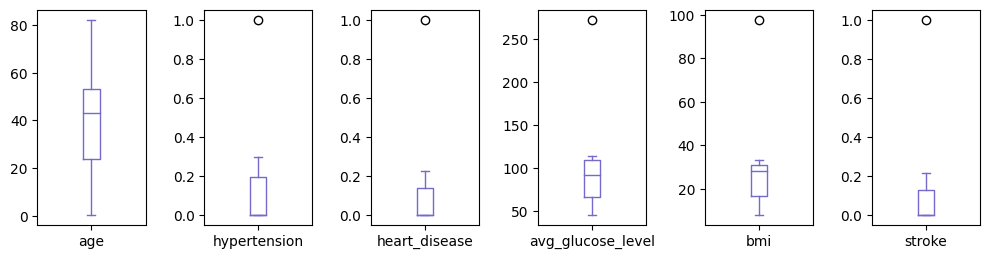

In [31]:
# Visual representation of data.describe()
#come fix tomorrow morning to remove
description.plot(kind='box', subplots=True, layout=(2, 6), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

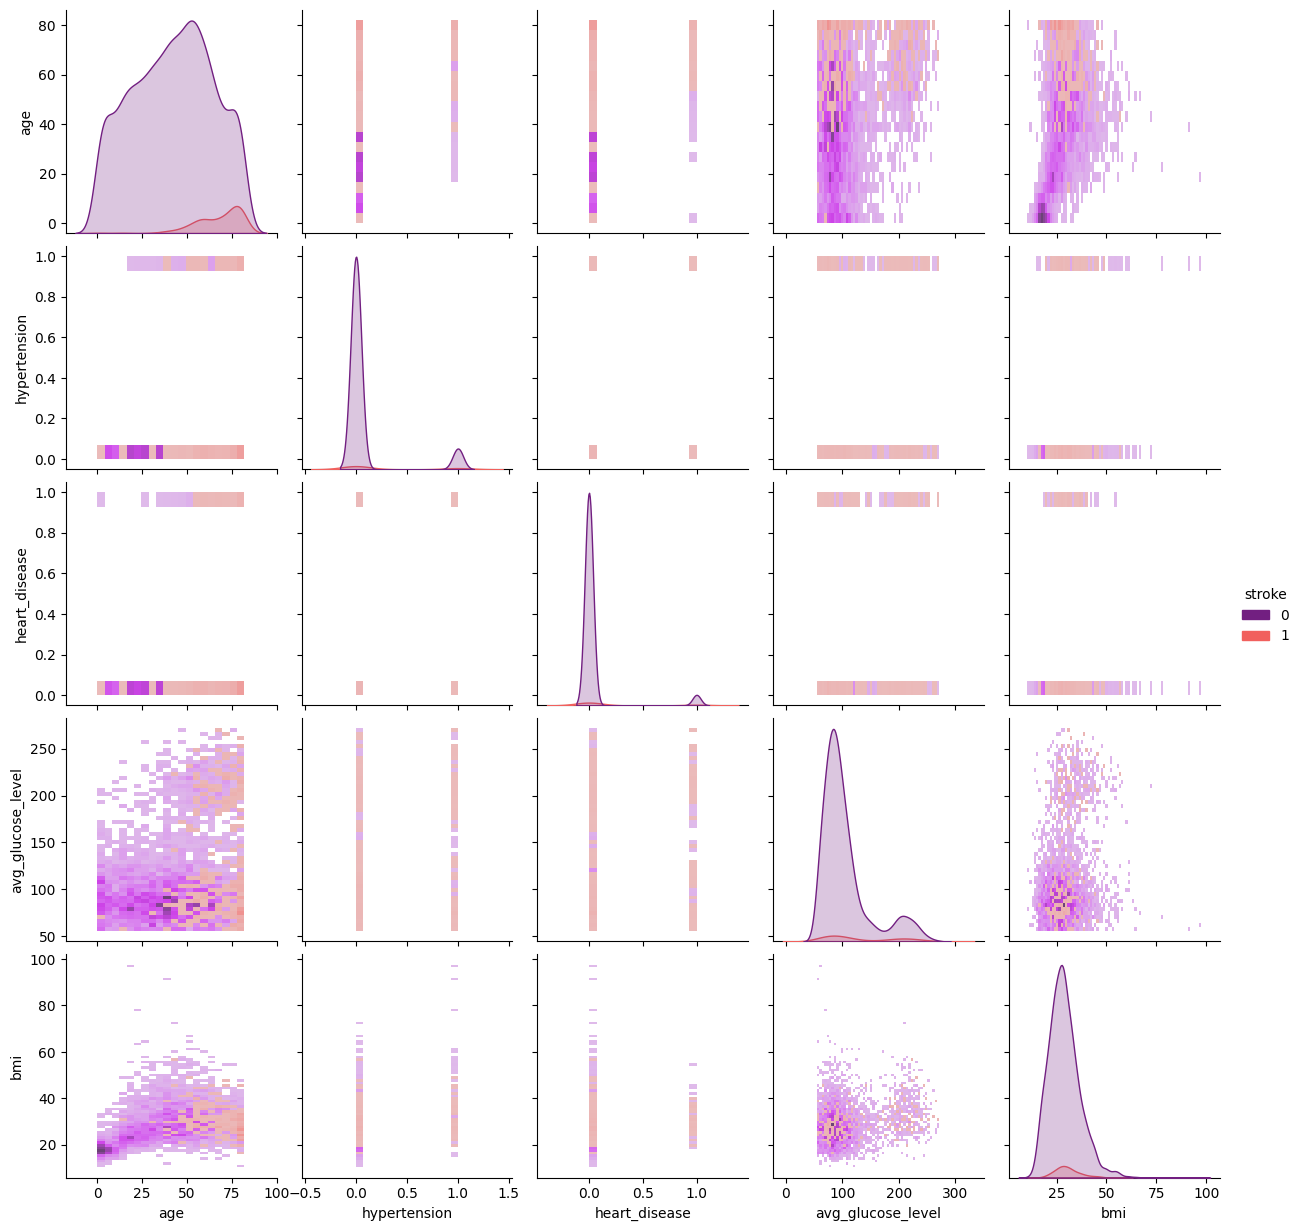

In [33]:
# Display pair plot for data visualization with stroke as the outcome results
#also dropping na values in this table for visualisation
sns.pairplot(data,hue='stroke', palette="magma",dropna=True,diag_kind="kde", kind = "hist")
plt.show()

The issue is that the rate of stroke/heart disease is so low you can't visualise them easily here. will try one hot encoding. However no sign of multicollinearity. Note that age seems to have a correlation with stoke.

## 4. Data engineering process (EL)

In [ ]:
### Emily
# Checking for missing values
print(data.isnull().sum())

# Replace "N/A" strings with NaN
data['bmi'].replace("N/A", np.nan, inplace=True)

# Calculate the median of the 'bmi' column
median_bmi = data['bmi'].median()

# Replace missing values (NaN) in 'bmi' with the median
data['bmi'].fillna(median_bmi, inplace=True)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
### Emily
# Recode gender to [0,1] variable

data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other':2})

# Recode ever_married to [0,1] variable

data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})

# Recode work_type to
# 0 = never_worked
# 1 = children
# 2 = Govt_job
# 3 = Private
# 4 = Self-employed
data['work_type'] = data['work_type'].map({'Never_worked': 0, 'children': 1,
                                           'Govt_job': 2, 'Private': 3, 'Self-employed': 4})

# Recode residence_type to [0,1] variable
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})

# Recode smoking_status to
# 0 = never smoked
# 1 = smokes
# 2 = formerly smoked
# 3 = Unknown
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0, 'smokes': 1,
                                           'formerly smoked': 2, 'Unknown': 3})

## 5. Prepare the data (EL)

In [ ]:
### Emily
# Split the data into features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Build the Logistic Regression Model (EK)

Decide on which predictors to include for model fitting


Ensure train and test X reflects this

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,4,0,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,1,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,0,1


<Axes: xlabel='smoking_status', ylabel='stroke'>

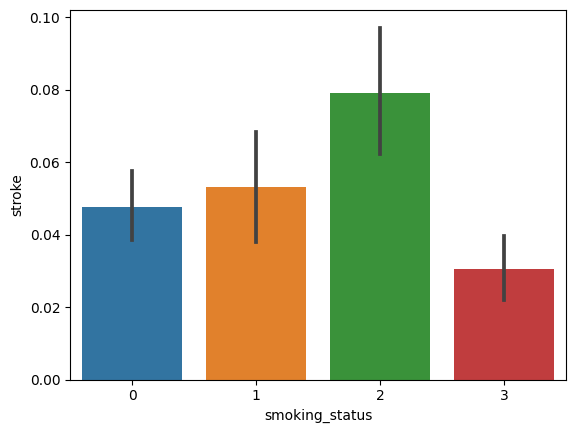

In [ ]:
sns.barplot(data, x='smoking_status', y='stroke')

<Axes: xlabel='gender', ylabel='stroke'>

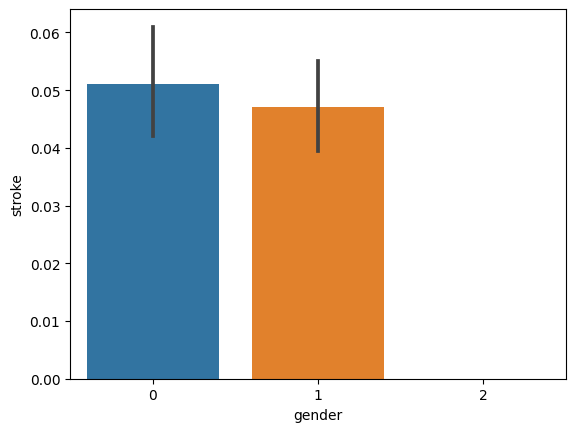

In [ ]:
sns.barplot(data, x='gender', y='stroke')

<Axes: xlabel='gender', ylabel='stroke'>

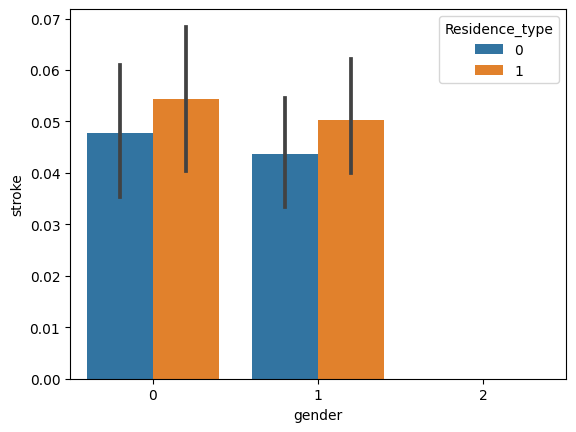

In [ ]:
sns.barplot(data, x='gender', y='stroke', hue='Residence_type')

<Axes: xlabel='gender', ylabel='age'>

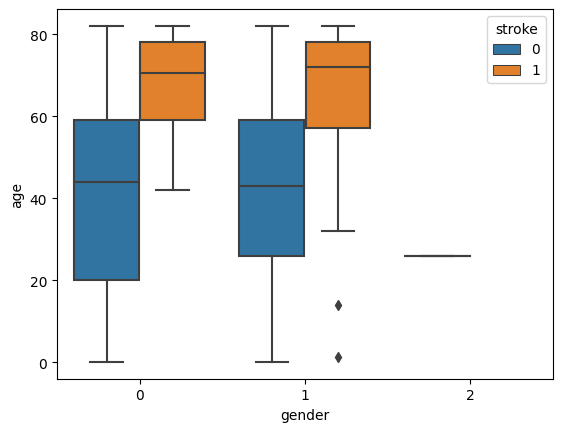

In [ ]:
sns.boxplot(data, x='gender', y='age', hue='stroke')

<Axes: xlabel='smoking_status', ylabel='age'>

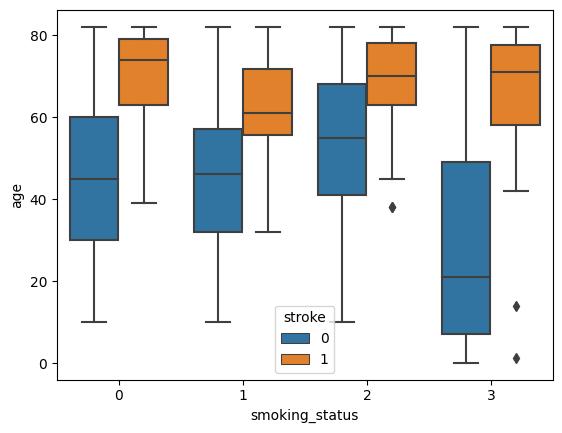

In [ ]:
sns.boxplot(data, x='smoking_status', y='age', hue='stroke')

<Axes: xlabel='hypertension', ylabel='stroke'>

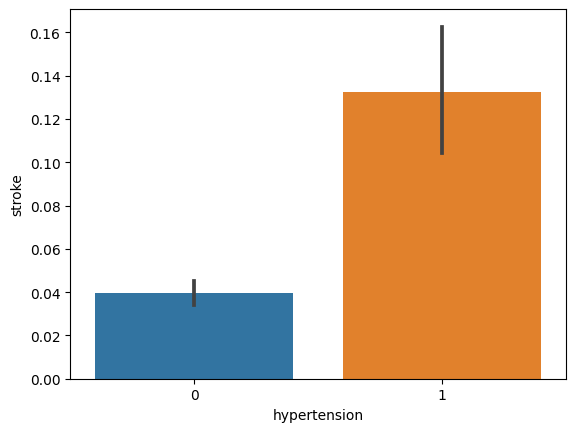

In [ ]:
sns.barplot(data, x='hypertension', y='stroke')

<Axes: xlabel='heart_disease', ylabel='stroke'>

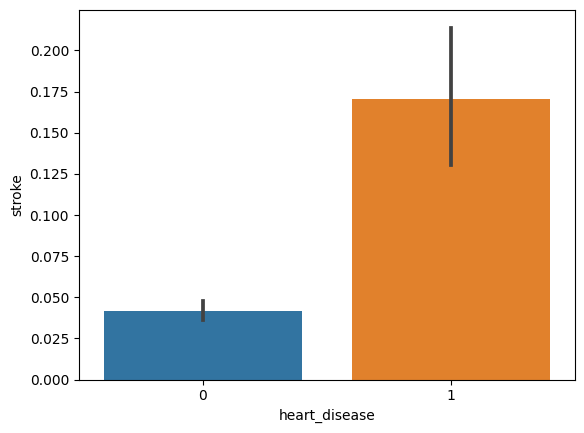

In [ ]:
sns.barplot(data, x='heart_disease', y='stroke')

<Axes: xlabel='heart_disease', ylabel='stroke'>

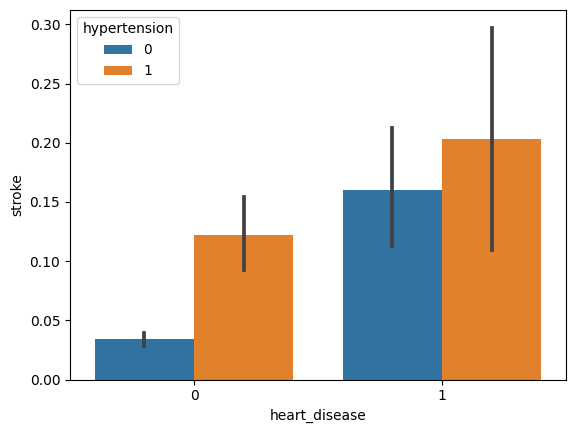

In [ ]:
sns.barplot(data, x='heart_disease', y='stroke', hue='hypertension')

Some further processing to the data, before we split it.

Use this version of train-test split, I explored additional interactions and associations

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
X = data.drop(columns = ['stroke', 'id', 'gender', 'ever_married', 'work_type', 'Residence_type'], axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
y_test.value_counts()

0    970
1     52
Name: stroke, dtype: int64

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## 6. Evaluate the model (EL)

In [ ]:
### Emily
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[970   0]
 [ 52   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



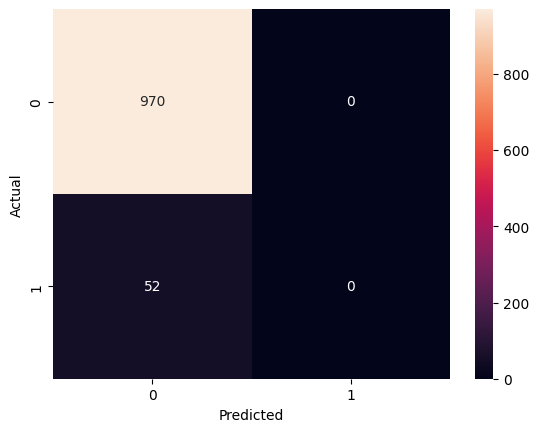

In [ ]:
### Emily
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 7. Further exploration (keep getting error bruh!!!!)

## 8. Summary of results (EL)

In [ ]:
### Emily
import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)